In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8')
df

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

# Data Manipulation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [3]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)

In [4]:
df.head(5)


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [5]:
# loại dòng dữ liệu rỗng
df.dropna(how='all', inplace=True)


In [6]:
# xóa dòng trùng
df.drop_duplicates(inplace=True)

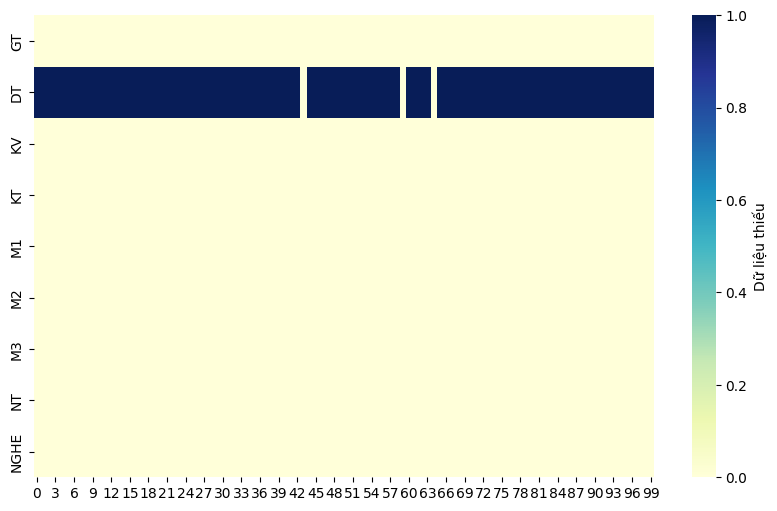

In [7]:
# biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [8]:
# điền giá trị thiếu
df['DT'].fillna('KINH', inplace=True)
#lưu ý với biến định tính ta có thể thay 
# bằng giá  trị yếu vị
# 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\3756640960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\3756640960.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)


In [9]:
# điền giá thị phần đDIEMTHI1 bằng trung bình nếu có 
df['M1'].fillna(df['M1'].mean(), inplace=True)
# điền giá trị DIEMTHI2 bằng trung vị
df['M2'].fillna(df['M2'].median(), inplace=True)
# lưu ý với biến định lượng thì ta nên thay bằng trung vị
# điền giá trị phần diemthi3 bằng 0 nếu có
df['M3'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\1633081117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['M1'].fillna(df['M1'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\1633081117.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [10]:
# Phàn 2 tạo cột dữ liệu
Kỹ thuật Feature Engineering

SyntaxError: invalid syntax (2460061796.py, line 2)

In [ ]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3

In [ ]:
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667


In [ ]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}8
df['NHOM'] = df['KT'].map(dict_map)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3


In [ ]:
# tạo biến nhóm khố thi Nhóm thõa mãn
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3


In [ ]:
df['NHOM'] = df['KT'].map(dict_map)
df
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3,0.0
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3,0.0


In [ ]:
Trực quan hóa dữ liệu 


SyntaxError: invalid syntax (40137777.py, line 1)

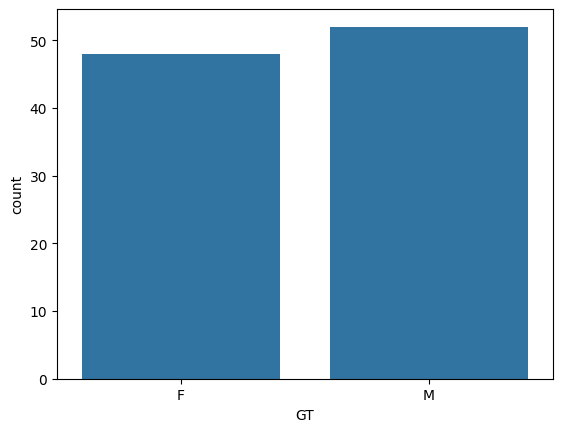

In [ ]:
# Data Visualization
sns.countplot(x='GT', data=df)
plt.show()

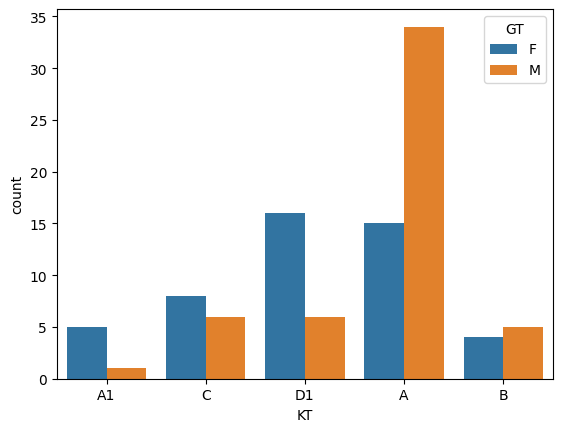

In [ ]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

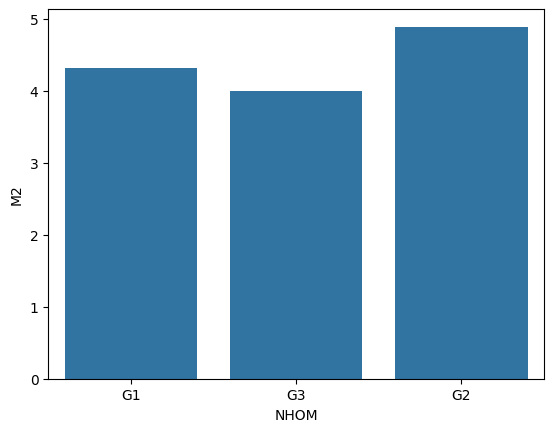

In [ ]:
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

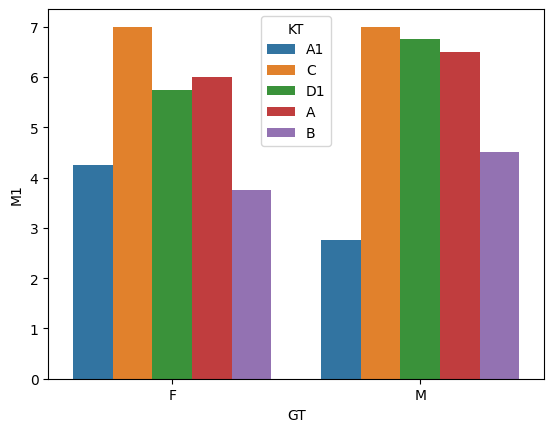

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

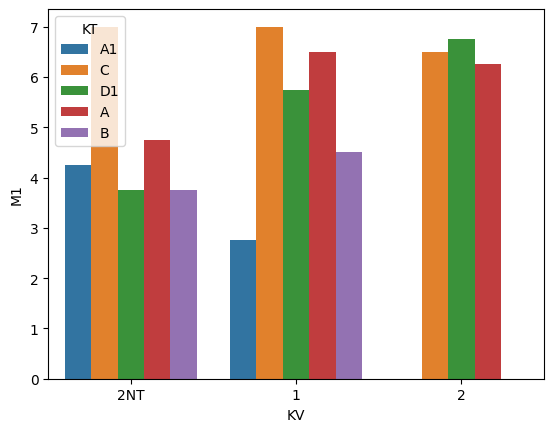

In [ ]:
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()


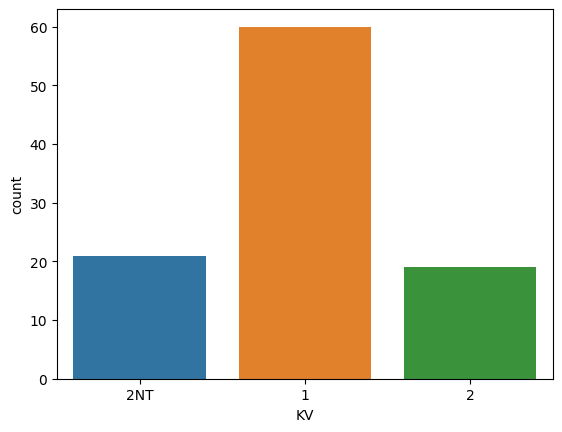

In [ ]:
sns.countplot(x='KV', hue='KV',data=df)
plt.show()

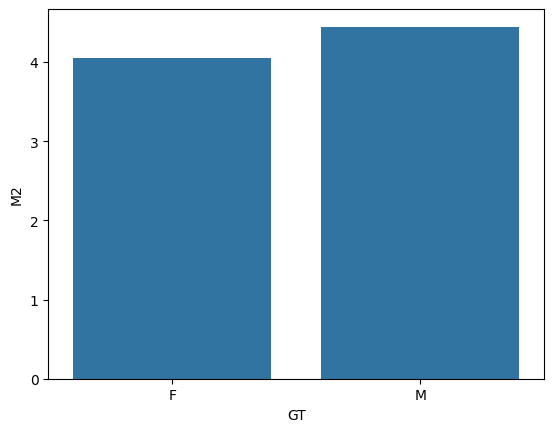

In [ ]:
sns.barplot(x='GT', y='M2', data=df, errorbar=None)
plt.show()

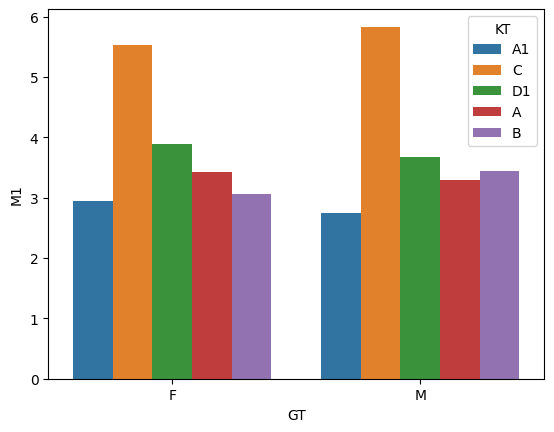

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

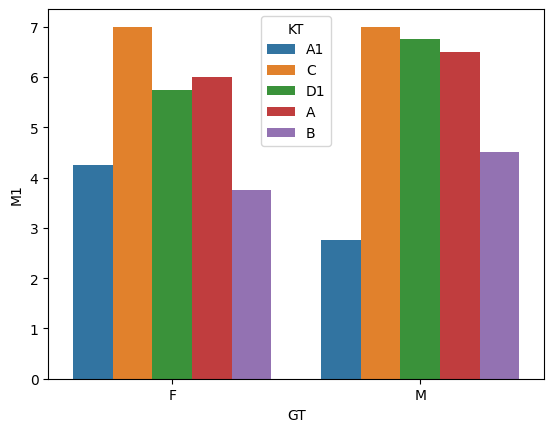

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

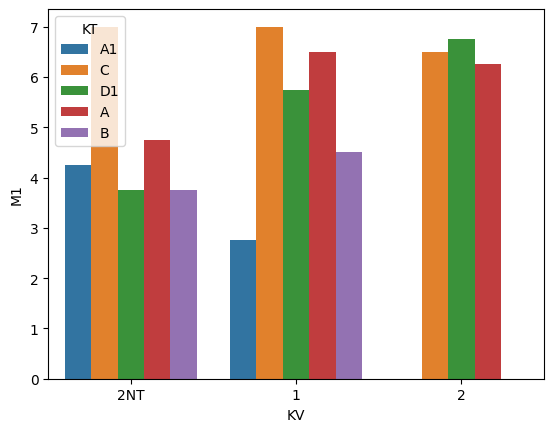

In [ ]:
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

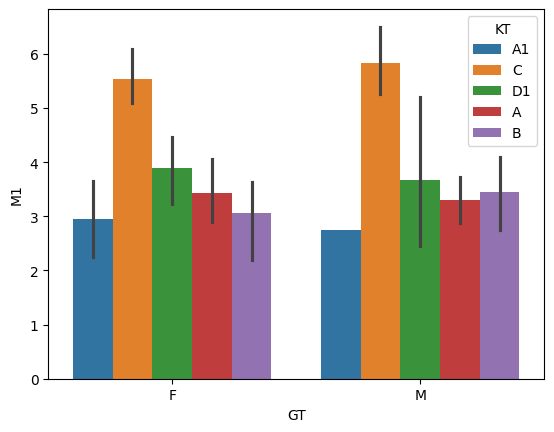

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

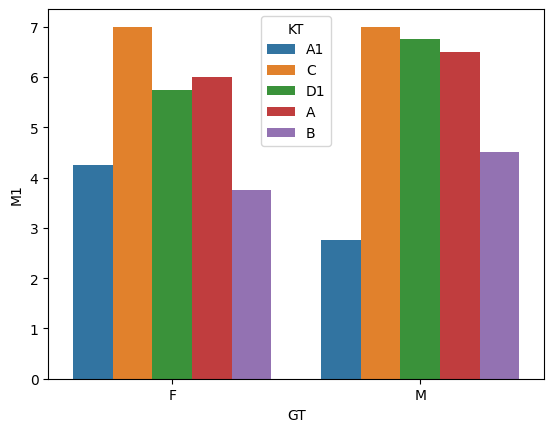

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()


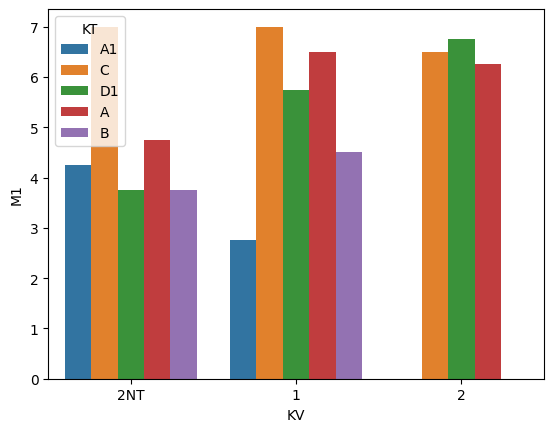

In [ ]:
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

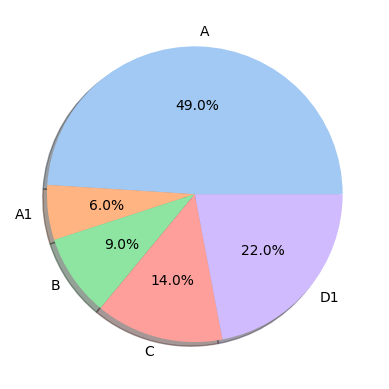

In [ ]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

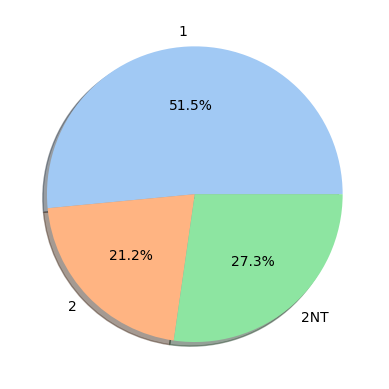

In [ ]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

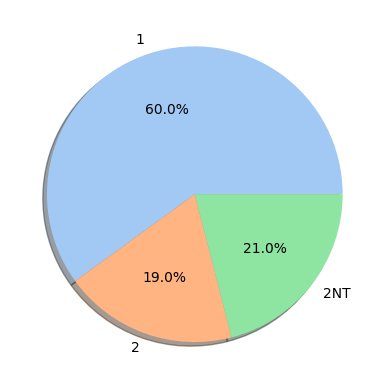

In [ ]:
gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

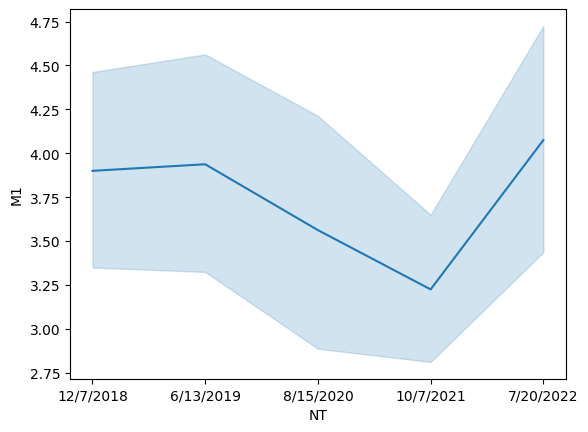

In [ ]:
sns.lineplot(x='NT', y='M1', data=df)
plt.show()

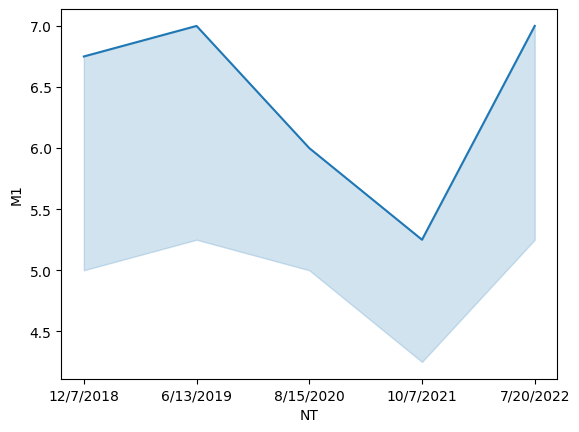

In [11]:
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()


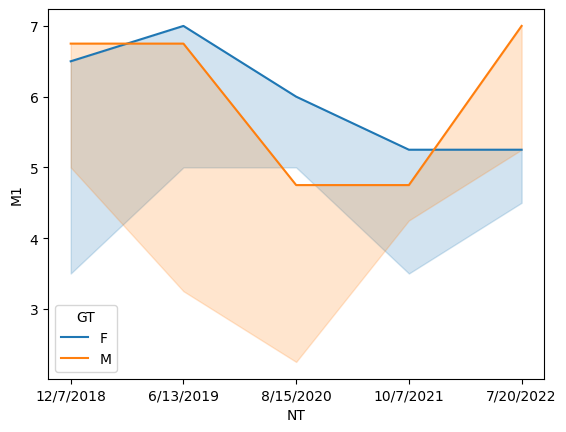

In [12]:
sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

In [13]:
# Thống kể dữ liệu (Mô tả dữ liệu)

print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



In [15]:
iqr = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)
iqr

np.float64(1.25)

In [16]:
range = df['M2'].max() - df['M2'].min()
range

np.float64(6.5)

In [21]:
Q1 = df[['M1', 'M2']].quantile(0.25)
Q3 = df[['M1', 'M2']].quantile(0.75)

# Calculate the Interquartile Range (IQR) for M1 and M2
IQR = Q3 - Q1

print("Q1 values:")
print(Q1)
print("\nQ3 values:")
print(Q3)
print("\nIQR values:")
print(IQR)



Q1 values:
M1    2.5
M2    3.5
Name: 0.25, dtype: float64

Q3 values:
M1    4.75
M2    4.75
Name: 0.75, dtype: float64

IQR values:
M1    2.25
M2    1.25
dtype: float64


In [18]:
mean_values = df[['M1', 'M2']].mean()

# Calculate the standard deviation for M1 and M2
std_dev_values = df[['M1', 'M2']].std()

# Difference between the standard deviation and the mean (mean-centered standard deviation)
mean_centered_std = std_dev_values - mean_values

print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_dev_values)
print("\nMean-centered standard deviation:")
print(mean_centered_std)

Mean values:
M1    3.740
M2    4.255
dtype: float64

Standard deviation values:
M1    1.424408
M2    1.060053
dtype: float64

Mean-centered standard deviation:
M1   -2.315592
M2   -3.194947
dtype: float64


<Axes: xlabel='M1', ylabel='Count'>

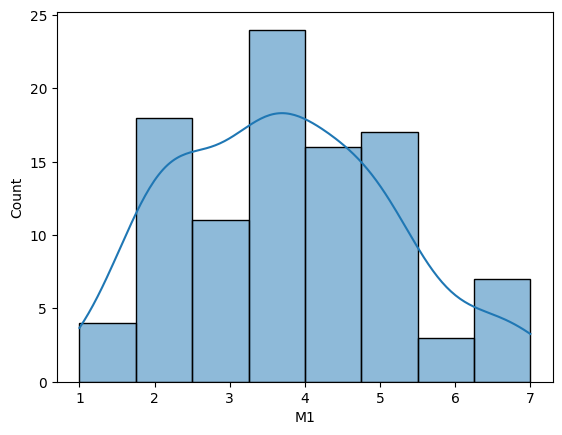

In [26]:
#sơ đồ histogram của m1
sns.histplot(df['M1'], kde=True)


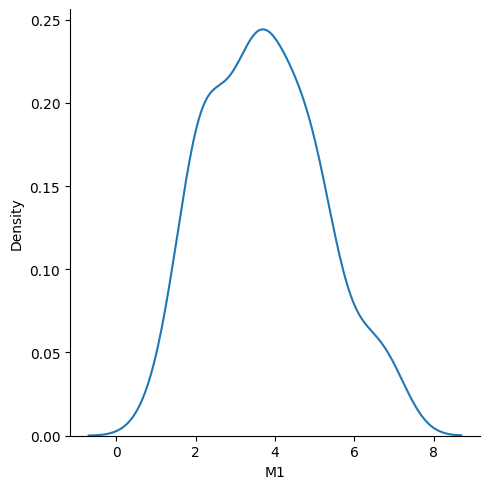

In [27]:
#nâng cao hơn histogram, thì ta khám phá dạng phân phố xác xuất 
sns.displot( df, x= 'M1', kind = 'kde')
plt.show()